In [5]:

#from sklearn.model_selection import cross_val_predict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn import linear_model

# Loading the dataset using pandas
data1=pd.read_csv("LinearRegressiondata.csv")

print('Baseball Players\' dataset: HITTER' )
print(data1)

print('shape of the data')
print(data1.shape)

instance_count,feature_count = data1.shape



Baseball Players' dataset: HITTER
                Player  AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  \
0       -Andy Allanson    293    66      1    30   29     14      1     293   
1          -Alan Ashby    315    81      7    24   38     39     14    3449   
2         -Alvin Davis    479   130     18    66   72     76      3    1624   
3        -Andre Dawson    496   141     20    65   78     37     11    5628   
4    -Andres Galarraga    321    87     10    39   42     30      2     396   
5     -Alfredo Griffin    594   169      4    74   51     35     11    4408   
6           -Al Newman    185    37      1    23    8     21      2     214   
7     -Argenis Salazar    298    73      0    24   24      7      3     509   
8       -Andres Thomas    323    81      6    26   32      8      2     341   
9      -Andre Thornton    401    92     17    49   66     65     13    5206   
10      -Alan Trammell    574   159     21   107   75     59     10    4631   
11       -Alex Tre

In [62]:
print(data1.info()) # meta-data about dataset
#data1.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
Player       322 non-null object
AtBat        322 non-null int64
Hits         322 non-null int64
HmRun        322 non-null int64
Runs         322 non-null int64
RBI          322 non-null int64
Walks        322 non-null int64
Years        322 non-null int64
CAtBat       322 non-null int64
CHits        322 non-null int64
CHmRun       322 non-null int64
CRuns        322 non-null int64
CRBI         322 non-null int64
CWalks       322 non-null int64
League       322 non-null object
Division     322 non-null object
PutOuts      322 non-null int64
Assists      322 non-null int64
Errors       322 non-null int64
Salary       263 non-null float64
NewLeague    322 non-null object
dtypes: float64(1), int64(16), object(4)
memory usage: 52.9+ KB
None


In [34]:
num_data = np.array(data1)

y = num_data[:,19] # extracting target feature
print(y.shape)

(322,)


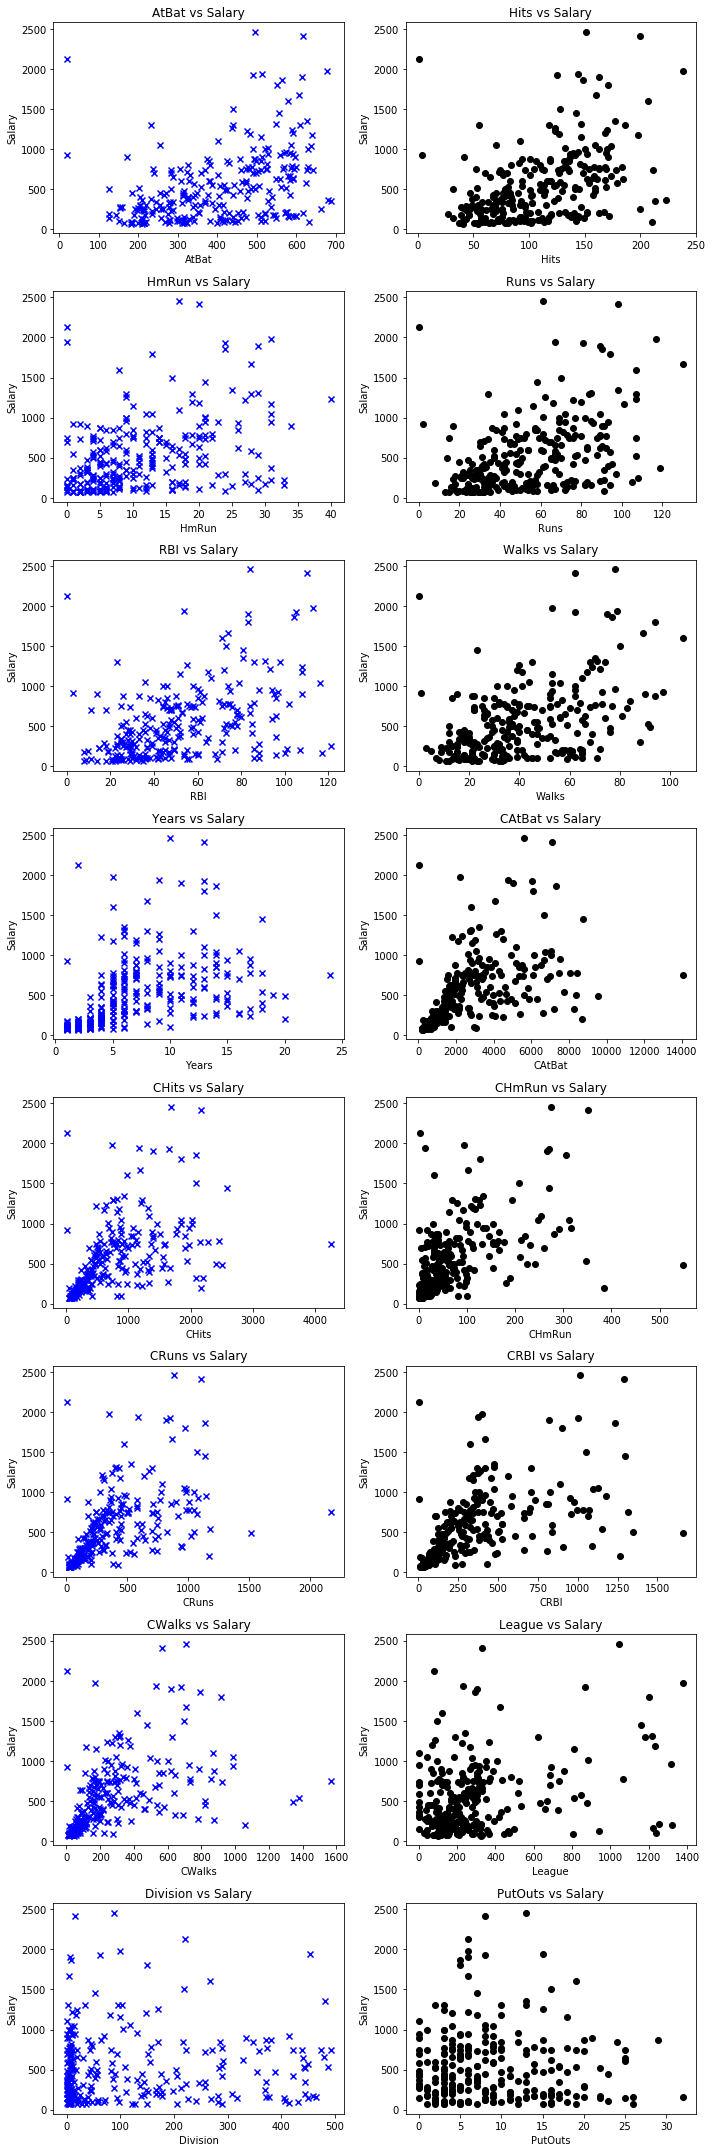

In [64]:
fig, ax = plt.subplots(nrows=8, ncols=2, figsize=(10,30))


label =['AtBat'  ,'Hits', 'HmRun', 'Runs', 'RBI', 'Walks','Years', 'CAtBat', 'CHits', 'CHmRun','CRuns', 'CRBI', 'CWalks', 'League', 'Division', 'PutOuts','Assists', 'Errors' ]      

index = [1,2,3,4,5,6,7,8,9,10,11,12,13,16,17,18]
m=0
for i in range(8):
    ax[i,0].scatter(num_data[:,index[m]], y, marker='x', color='b')
   
    ax[i,0].set_xlabel(label[m])
    ax[i,0].set_ylabel('Salary')
    ax[i,0].set_title(label[m]+' vs Salary')
    m+=1
        
    ax[i,1].scatter(num_data[:,index[m]], y, marker='o', color='k')
    ax[i,1].set_xlabel(label[m])
    ax[i,1].set_ylabel('Salary')
    ax[i,1].set_title(label[m]+' vs Salary')
    
    m+=1
plt.tight_layout()
plt.show()

In [89]:

num_data = np.array(data1)

print(num_data[:5]) # first five instances 

x = num_data[:,[11]] # selecting Hits as X
y = num_data[:,[19]] # extracting target feature
print(x[:5])
print(y[:5])


# case 1: set missing values equal to Zero
for j in range(322):
    if math.isnan(y[j]):
        y[j]=0;
               

[['-Andy Allanson' 293 66 1 30 29 14 1 293 66 1 30 29 14 'A' 'E' 446 33 20
  nan 'A']
 ['-Alan Ashby' 315 81 7 24 38 39 14 3449 835 69 321 414 375 'N' 'W' 632 43
  10 475.0 'N']
 ['-Alvin Davis' 479 130 18 66 72 76 3 1624 457 63 224 266 263 'A' 'W' 880
  82 14 480.0 'A']
 ['-Andre Dawson' 496 141 20 65 78 37 11 5628 1575 225 828 838 354 'N' 'E'
  200 11 3 500.0 'N']
 ['-Andres Galarraga' 321 87 10 39 42 30 2 396 101 12 48 46 33 'N' 'E' 805
  40 4 91.5 'N']]
[[30]
 [321]
 [224]
 [828]
 [48]]
[[nan]
 [475.0]
 [480.0]
 [500.0]
 [91.5]]


In [90]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size = .3,shuffle=False) # slpitting data in to training and testing sets

lr1 = linear_model.LinearRegression() # instantiation of Linear Regression model

lr1.fit(x_train1,y_train1); # learning 

y_pred1 = lr1.predict(x_test1)  # tesing the model

mse1 = sk.metrics.mean_squared_error(y_test1, y_pred1)
r2_score1 = sk.metrics.r2_score(y_test1, y_pred1)
print("MSE :",mse1)
print('R2 Score:',r2_score1)

MSE : 146646.309203
R2 Score: 0.148115414536


In [133]:
print('Actual Salary \t \t Predicted Salary')
for k in range(len(y_test1)):
    print(y_test1[k],'\t-\t',y_pred1[k])

Actual Salary 	 	 Predicted Salary
[0] 	-	 [ 301.4698066]
[175.0] 	-	 [ 274.91871123]
[200.0] 	-	 [ 302.16851963]
[0] 	-	 [ 673.18514182]
[1940.0] 	-	 [ 592.13442963]
[700.0] 	-	 [ 307.75822392]
[750.0] 	-	 [ 355.96942342]
[450.0] 	-	 [ 709.5182197]
[172.0] 	-	 [ 242.07919853]
[1260.0] 	-	 [ 657.11474199]
[0] 	-	 [ 379.02695361]
[750.0] 	-	 [ 1697.49845279]
[190.0] 	-	 [ 300.77109356]
[580.0] 	-	 [ 359.4629886]
[130.0] 	-	 [ 213.43196405]
[450.0] 	-	 [ 624.97394233]
[300.0] 	-	 [ 309.15565]
[250.0] 	-	 [ 370.64239718]
[1050.0] 	-	 [ 859.04280943]
[215.0] 	-	 [ 256.05345925]
[400.0] 	-	 [ 490.82103939]
[0] 	-	 [ 355.27071038]
[560.0] 	-	 [ 358.76427556]
[1670.0] 	-	 [ 787.07536671]
[487.5] 	-	 [ 1239.14270109]
[0] 	-	 [ 186.18215564]
[425.0] 	-	 [ 351.07843216]
[500.0] 	-	 [ 471.25707438]
[0] 	-	 [ 204.34869458]
[0] 	-	 [ 449.59697026]
[250.0] 	-	 [ 256.05345925]
[400.0] 	-	 [ 634.0572118]
[450.0] 	-	 [ 390.90507522]
[750.0] 	-	 [ 448.19954419]
[70.0] 	-	 [ 207.14354672]
[875.0] 	-	 [ 4

In [91]:
m1 = lr1.coef_[0]  
c1 = lr1.intercept_
print(' y_pred = {0} * x + {1}'.format(m1, c1)) # equation of line


 y_pred = [ 0.69871304] * x + [ 184.78472956]


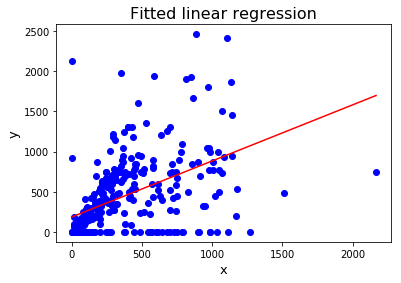

In [92]:

max_x = max(x)
min_x = min(x)

plt.scatter(x, y, color='blue') 
plt.plot([min_x, max_x], [ m1*min_x + c1, m1*max_x + c1], 'r')
plt.title('Fitted linear regression', fontsize=16)
plt.xlabel('x', fontsize=13)
plt.ylabel('y', fontsize=13)
plt.show()

In [93]:
# fill up the missing values with the mean value of salary

y = num_data[:,[19]]
sum =0
for j in range(322):
    if not math.isnan(y[j]):
        sum = sum + y[j]

mean = sum/instance_count
print(int(mean))
for j in range(322):
    if math.isnan(y[j]):     
        y[j]=mean
            
            
print(y)

437
[[437.7282826086956]
 [475.0]
 [480.0]
 [500.0]
 [91.5]
 [750.0]
 [70.0]
 [100.0]
 [75.0]
 [1100.0]
 [517.143]
 [512.5]
 [550.0]
 [700.0]
 [240.0]
 [437.7282826086956]
 [775.0]
 [175.0]
 [437.7282826086956]
 [135.0]
 [100.0]
 [115.0]
 [437.7282826086956]
 [600.0]
 [776.6669999999999]
 [765.0]
 [708.3330000000001]
 [750.0]
 [625.0]
 [900.0]
 [437.7282826086956]
 [110.0]
 [437.7282826086956]
 [612.5]
 [300.0]
 [850.0]
 [437.7282826086956]
 [90.0]
 [437.7282826086956]
 [437.7282826086956]
 [67.5]
 [437.7282826086956]
 [437.7282826086956]
 [180.0]
 [437.7282826086956]
 [305.0]
 [215.0]
 [247.5]
 [437.7282826086956]
 [815.0]
 [875.0]
 [70.0]
 [437.7282826086956]
 [1200.0]
 [675.0]
 [415.0]
 [340.0]
 [437.7282826086956]
 [416.667]
 [1350.0]
 [90.0]
 [275.0]
 [230.0]
 [225.0]
 [437.7282826086956]
 [950.0]
 [437.7282826086956]
 [75.0]
 [105.0]
 [437.7282826086956]
 [320.0]
 [437.7282826086956]
 [850.0]
 [535.0]
 [933.3330000000001]
 [850.0]
 [210.0]
 [437.7282826086956]
 [325.0]
 [275.0]
 

In [94]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size = .3)
lr2 = linear_model.LinearRegression()

lr2.fit(x_train2,y_train2);

y_pred2 = lr2.predict(x_test2)

mse2 = sk.metrics.mean_squared_error(y_test2, y_pred2)
r2_score2 = sk.metrics.r2_score(y_test2, y_pred2)
print('mse :',mse2)
print('R2 Score :',r2_score2)

mse : 125211.474855
R2 Score : 0.275530893584


In [95]:
m2 = lr2.coef_[0]
c2 = lr2.intercept_
print(' y_prd = {0} * x + {1}'.format(m2, c2))

 y_prd = [ 0.56287022] * x + [ 304.24268856]


In [134]:
print('Actual Salary \t \t Predicted Salary')
for k in range(len(y_test2)):
    print(y_test2[k],'\t-\t',y_pred2[k])

Actual Salary 	 	 Predicted Salary
[2412.5] 	-	 [ 925.65140728]
[950.0] 	-	 [ 581.17483495]
[1900.0] 	-	 [ 761.85617436]
[247.5] 	-	 [ 370.09850386]
[490.0] 	-	 [ 492.804211]
[437.7282826086956] 	-	 [ 326.194627]
[1100.0] 	-	 [ 745.53293809]
[450.0] 	-	 [ 658.85092479]
[750.0] 	-	 [ 442.70876176]
[300.0] 	-	 [ 392.0504423]
[80.0] 	-	 [ 354.33813781]
[535.0] 	-	 [ 545.71401133]
[202.5] 	-	 [ 370.09850386]
[740.0] 	-	 [ 582.30057538]
[875.0] 	-	 [ 509.69031749]
[740.0] 	-	 [ 502.37300468]
[1183.333] 	-	 [ 549.65410284]
[800.0] 	-	 [ 558.09715608]
[500.0] 	-	 [ 770.2992276]
[1050.0] 	-	 [ 847.41244723]
[437.7282826086956] 	-	 [ 375.16433581]
[100.0] 	-	 [ 327.32036743]
[1300.0] 	-	 [ 528.82790484]
[305.0] 	-	 [ 365.03267192]
[365.0] 	-	 [ 610.44408619]
[437.7282826086956] 	-	 [ 353.77526759]
[550.0] 	-	 [ 419.63108289]
[575.0] 	-	 [ 425.82265527]
[165.0] 	-	 [ 361.0925804]
[530.0] 	-	 [ 557.53428587]
[210.0] 	-	 [ 414.56525095]
[75.0] 	-	 [ 314.37435246]
[500.0] 	-	 [ 894.13067517]
[200.0

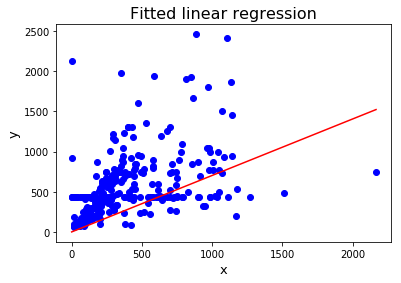

In [96]:
plt.scatter(x, y, color='blue')  # you can use test_data_X and test_data_Y instead.
plt.plot([min_x, max_x], [m2*min_x, m2*max_x + c2], 'r')
plt.title('Fitted linear regression', fontsize=16)
plt.xlabel('x', fontsize=13)
plt.ylabel('y', fontsize=13)
plt.show()

In [97]:
 new_data = np.array(data1)

i=0
index_list = np.zeros(322)
for itr in range(instance_count):
    if  math.isnan(new_data[itr,19]):
        index_list[i] = itr
        i=i+1
filtered_data1 = np.delete(new_data,index_list,axis=0)

print('number of NA (missing values):',i)
print(filtered_data1.shape)

number of NA (missing values): 59
(263, 21)


/home/sawan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  if __name__ == '__main__':


In [98]:
filtered_data1[0:5]

array([['-Alan Ashby', 315, 81, 7, 24, 38, 39, 14, 3449, 835, 69, 321, 414,
        375, 'N', 'W', 632, 43, 10, 475.0, 'N'],
       ['-Alvin Davis', 479, 130, 18, 66, 72, 76, 3, 1624, 457, 63, 224,
        266, 263, 'A', 'W', 880, 82, 14, 480.0, 'A'],
       ['-Andre Dawson', 496, 141, 20, 65, 78, 37, 11, 5628, 1575, 225,
        828, 838, 354, 'N', 'E', 200, 11, 3, 500.0, 'N'],
       ['-Andres Galarraga', 321, 87, 10, 39, 42, 30, 2, 396, 101, 12, 48,
        46, 33, 'N', 'E', 805, 40, 4, 91.5, 'N'],
       ['-Alfredo Griffin', 594, 169, 4, 74, 51, 35, 11, 4408, 1133, 19,
        501, 336, 194, 'A', 'W', 282, 421, 25, 750.0, 'A']], dtype=object)

In [102]:
x = filtered_data1[:,[11]]
y = filtered_data1[:,19]
print(x.shape)

(263, 1)


In [103]:
x[0:5]

array([[321],
       [224],
       [828],
       [48],
       [501]], dtype=object)

In [104]:
y[0:5]

array([475.0, 480.0, 500.0, 91.5, 750.0], dtype=object)

In [105]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(x, y, test_size = .3)
lr3 = linear_model.LinearRegression()
lr3.fit(x_train3,y_train3);

y_pred3 = lr3.predict(x_test3)

mse3 = np.mean((y_pred3 - y_test3) ** 2)
print('MSE :',mse3)

r2_score3 = sk.metrics.r2_score(y_test3, y_pred3)
print('R2 Score',r2_score3)

MSE : 97729.85117910788
R2 Score 0.432823832139


In [106]:
m3 = lr3.coef_[0]
c3 = lr3.intercept_
print(' y_prd = {0} * x + {1}'.format(m3, c3))

 y_prd = 0.7245893265355194 * x + 278.243520598058


In [135]:
print('Actual Salary \t \t Predicted Salary')
for k in range(len(y_test3)):
    print(y_test3[k],'\t-\t',y_pred3[k])

Actual Salary 	 	 Predicted Salary
70.0 	-	 301.430379047
150.0 	-	 327.515594802
725.0 	-	 573.875965825
1450.0 	-	 1102.8261742
750.0 	-	 455.767905599
475.0 	-	 394.177812844
420.0 	-	 802.84619301
750.0 	-	 505.039979804
425.0 	-	 450.695780314
750.0 	-	 551.413696702
215.0 	-	 385.482740925
70.0 	-	 299.981200394
1175.0 	-	 493.446550579
740.0 	-	 533.298963539
775.0 	-	 517.357998355
175.0 	-	 325.341826823
250.0 	-	 470.984281457
91.5 	-	 313.023808272
305.0 	-	 356.499167864
733.3330000000001 	-	 1053.55409999
90.0 	-	 302.8795577
365.0 	-	 468.08592415
612.5 	-	 436.928583109
215.0 	-	 352.151631905
105.0 	-	 323.89264817
240.0 	-	 421.712207252
137.0 	-	 336.210666721
68.0 	-	 296.358253761
277.5 	-	 408.669599374
100.0 	-	 292.735307129
625.0 	-	 531.125195559
160.0 	-	 423.885975232
175.0 	-	 371.715543721
260.0 	-	 818.787158194
247.5 	-	 363.020471803
140.0 	-	 329.689362782
950.0 	-	 1104.99994218
120.0 	-	 326.066416149
120.0 	-	 320.994290864
145.0 	-	 341.282792007
90

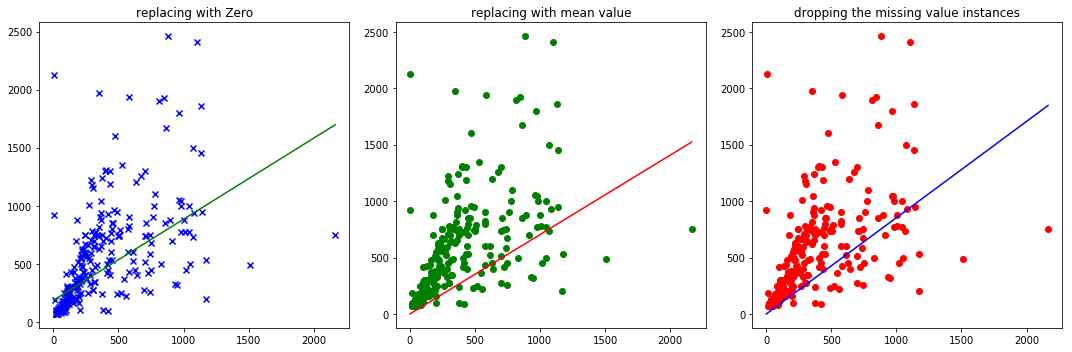

In [107]:

max_x = max(x)
min_x = min(x)


fig, ax2 = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

ax2[0].scatter(x, y, marker='x', color='b')
ax2[0].plot([min_x, max_x], [ m1*min_x + c1, m1*max_x + c1], 'g')

ax2[0].set_title('replacing with Zero')

        
ax2[1].scatter(x, y, marker='o', color='g')
ax2[1].plot([min_x, max_x], [m2*min_x, m2*max_x + c2], 'r')

ax2[1].set_title('replacing with mean value')

ax2[2].scatter(x, y, marker='o', color='r')
ax2[2].plot([min_x, max_x], [m3*min_x, m3*max_x + c3], 'b')

ax2[2].set_title('dropping the missing value instances')

plt.tight_layout()
plt.show()

In [108]:
print('equation of hyper plan [CASE 1]:')
print(' y_prd = {0} * x + {1}'.format(m1, c1))
print('\n equation of hyper plan [CASE 2]:')
print(' y_prd = {0} * x + {1}'.format(m2, c2))
print('\n equation of hyper plan [CASE 3]:')
print(' y_prd = {0} * x + {1}'.format(m3, c3))

equation of hyper plan [CASE 1]:
 y_prd = [ 0.69871304] * x + [ 184.78472956]

 equation of hyper plan [CASE 2]:
 y_prd = [ 0.56287022] * x + [ 304.24268856]

 equation of hyper plan [CASE 3]:
 y_prd = 0.7245893265355194 * x + 278.243520598058


In [109]:
print('score table')
print('_____________________________________________________________________________')
print('case \t\t\t \t MSE \t\t\t R2 Score')
print('_____________________________________________________________________________\n')
print('replacing with Zero \t\t',mse1,'\t\t',r2_score1)
print('\n')
print('replacing with mean \t\t',mse2,'\t\t',r2_score2)
print('\n')
print('drop the instance \t\t',mse3,'\t',r2_score3)

print('_____________________________________________________________________________')

score table
_____________________________________________________________________________
case 			 	 MSE 			 R2 Score
_____________________________________________________________________________

replacing with Zero 		 146646.309203 		 0.148115414536


replacing with mean 		 125211.474855 		 0.275530893584


drop the instance 		 97729.85117910788 	 0.432823832139
_____________________________________________________________________________


In [110]:
data1

,Player,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.000,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.000,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.000,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.500,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.000,A
6,-Al Newman,185,37,1,23,8,21,2,214,42,...,30,9,24,N,E,76,127,7,70.000,A
7,-Argenis Salazar,298,73,0,24,24,7,3,509,108,...,41,37,12,A,W,121,283,9,100.000,A
8,-Andres Thomas,323,81,6,26,32,8,2,341,86,...,32,34,8,N,W,143,290,19,75.000,N
9,-Andre Thornton,401,92,17,49,66,65,13,5206,1332,...,784,890,866,A,E,0,0,0,1100.000,A


In [119]:
#del data1['Player']
#del data1['League']

del data1['Division']
del data1['NewLeague']

In [120]:
data1

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.000
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.000
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.000
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.500
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.000
6,185,37,1,23,8,21,2,214,42,1,30,9,24,76,127,7,70.000
7,298,73,0,24,24,7,3,509,108,0,41,37,12,121,283,9,100.000
8,323,81,6,26,32,8,2,341,86,6,32,34,8,143,290,19,75.000
9,401,92,17,49,66,65,13,5206,1332,253,784,890,866,0,0,0,1100.000


In [122]:
# Multiple Linear Regression

new_data2 = np.array(data1)


# droping missing value instances
i=0
index_list2 = np.zeros(322)
for itr in range(instance_count):
    if  math.isnan(new_data2[itr,16]):
        index_list2[i] = itr
        i=i+1
filtered_data2 = np.delete(new_data2,index_list2,axis=0)

print('number of NA (missing values):',i)
print(filtered_data2.shape)

number of NA (missing values): 59
(263, 17)


/home/sawan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  if __name__ == '__main__':


In [128]:
x = filtered_data2[:,0:16]
print(x[0])

y = filtered_data2[:,16]

y[0]

[  315.    81.     7.    24.    38.    39.    14.  3449.   835.    69.
   321.   414.   375.   632.    43.    10.]


475.0

In [144]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(x, y, test_size = .3)
lr4 = linear_model.LinearRegression()
lr4.fit(x_train4,y_train4);

y_pred4 = lr4.predict(x_test4)

mse4 = np.mean((y_pred4 - y_test4) ** 2)
print('MSE :',mse4)

r2_score4 = sk.metrics.r2_score(y_test4, y_pred4)
print('R2 Score',r2_score4)

MSE : 124436.588533
R2 Score 0.511322346308


In [131]:

print('C :',lr4.intercept_)
print('Theta Values: \n',lr4.coef_)

C : 241.424608225
Theta Values: 
 [ -2.92436433e+00   9.75929179e+00  -7.05242209e+00  -4.25631727e+00
   2.06827161e+00   8.48271541e+00  -1.88418097e+01  -6.10025926e-03
  -6.44331246e-01   2.06903192e+00   2.25289511e+00   4.32639578e-01
  -1.16728007e+00   3.47714909e-01   3.80115966e-01  -1.08186424e+00]


In [145]:
print('Actual Salary \t \t Predicted Salary')
for k in range(len(y_test4)):
    print(y_test4[k],'\t-\t',y_pred4[k])

Actual Salary 	 	 Predicted Salary
340.0 	-	 292.124918679
815.0 	-	 555.275116091
247.5 	-	 243.872556646
90.0 	-	 860.466096414
90.0 	-	 299.906314684
535.0 	-	 538.396833882
415.0 	-	 162.362396535
240.0 	-	 311.403808933
800.0 	-	 890.831310524
512.5 	-	 266.250881503
940.0 	-	 451.797899886
625.0 	-	 629.662470559
650.0 	-	 285.556379744
900.0 	-	 393.262404613
950.0 	-	 1109.66732944
1175.0 	-	 670.495621521
1000.0 	-	 765.444244315
215.0 	-	 461.028486589
750.0 	-	 532.792013767
920.0 	-	 348.420174587
160.0 	-	 115.602556752
2460.0 	-	 1431.7845839
190.0 	-	 250.162205321
740.0 	-	 971.009159321
240.0 	-	 191.786883104
765.0 	-	 520.030456346
210.0 	-	 363.955344109
70.0 	-	 166.301301491
245.0 	-	 320.519216574
300.0 	-	 175.416883028
750.0 	-	 519.34490662
250.0 	-	 196.887806862
773.333 	-	 784.569131695
587.5 	-	 837.824587637
625.0 	-	 581.067719398
500.0 	-	 470.788828872
787.5 	-	 588.220565318
875.0 	-	 374.068729406
95.0 	-	 235.717165652
375.0 	-	 166.34838352
175.0 	